## Staging field for experimenting with dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

from datetime import datetime, date 

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 200) #total row able to be displayed in jupyter notebook
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("Aquifer_Petrignano.csv")

# Drop data before 2009 for the purpose of this tutorial
df = df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)
# Drop one of the target columns, so we can focus on only one target
df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)

# Simplify column names
df.columns = ['Date', 'Rainfall', 'Depth_to_Groundwater', 'Temperature', 'Drainage_Volume', 'River_Hydrometry']
targets = ['Depth_to_Groundwater']
features = [feature for feature in df.columns if feature not in targets]
df['Date'] = pd.to_datetime(df.Date, format = '%d/%m/%Y') #convert date to datetime format
df.head()

,Date,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry
0,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
1,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
2,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
3,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
4,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3


### Staging Area

In [4]:
# Converting 0 values to null
df.Drainage_Volume = np.where(df.Drainage_Volume == 0, np.nan, df.Drainage_Volume)
df.River_Hydrometry = df.River_Hydrometry.mask(df.River_Hydrometry == 0, np.nan)

In [14]:
df['Drainage_Volume'] = df['Drainage_Volume'].interpolate()
df['River_Hydrometry'] = df['River_Hydrometry'].interpolate()
df['Depth_to_Groundwater'] = df['Depth_to_Groundwater'].interpolate()

In [16]:
df_downsampled = df[['Date',
                     'Depth_to_Groundwater', 
                     'Temperature',
                     'Drainage_Volume', 
                     'River_Hydrometry'
                    ]].resample('7D', on='Date').mean().reset_index(drop=False)

df_downsampled['Rainfall'] = df[['Date',
                                 'Rainfall'
                                ]].resample('7D', on='Date').sum().reset_index(drop=False)[['Rainfall']]

df = df_downsampled

In [15]:
df

,Date,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry,Rainfall
0,2009-01-01,-31.048571,1.657143,-28164.918857,2.371429,0.0
1,2009-01-08,-30.784286,4.571429,-29755.789714,2.314286,2.0
2,2009-01-15,-30.420000,7.528571,-25463.190857,2.300000,0.2
3,2009-01-22,-30.018571,6.214286,-23854.422857,2.500000,4.1
4,2009-01-29,-29.790000,5.771429,-25210.532571,2.500000,9.9
...,...,...,...,...,...,...
595,2020-05-28,-24.697143,17.214286,-25591.062857,2.414286,24.6
596,2020-06-04,-24.638571,18.785714,-24567.099429,2.628571,46.2
597,2020-06-11,-24.751429,19.200000,-27178.416000,2.771429,20.0
598,2020-06-18,-24.822857,21.942857,-28030.134857,2.600000,1.4


In [114]:
#a = np.random.randint(1, 10, 100)
df_a = pd.DataFrame({'A': np.random.randint(1, 10, 30)})
df_a['cum_sum'] = df_a.A.cumsum()
df_a['rolling_mean'] = df_a.A.rolling(3).mean()
df_a['rolling_sum'] = df_a.A.rolling(3).sum()

In [152]:
df_a

,A,cum_sum,rolling_mean,rolling_sum
0,2,2,NaN,NaN
1,6,8,NaN,NaN
2,3,11,3.666667,11.0
3,1,12,3.333333,10.0
4,1,13,1.666667,5.0
5,3,16,1.666667,5.0
6,8,24,4.000000,12.0
7,1,25,4.000000,12.0
8,4,29,4.333333,13.0
9,2,31,2.333333,7.0


In [143]:
df.columns

Index(['Date', 'Depth_to_Groundwater', 'Temperature', 'Drainage_Volume',
       'River_Hydrometry', 'Rainfall'],
      dtype='object')

In [147]:
for i in range(2):
    print(i)

0
1


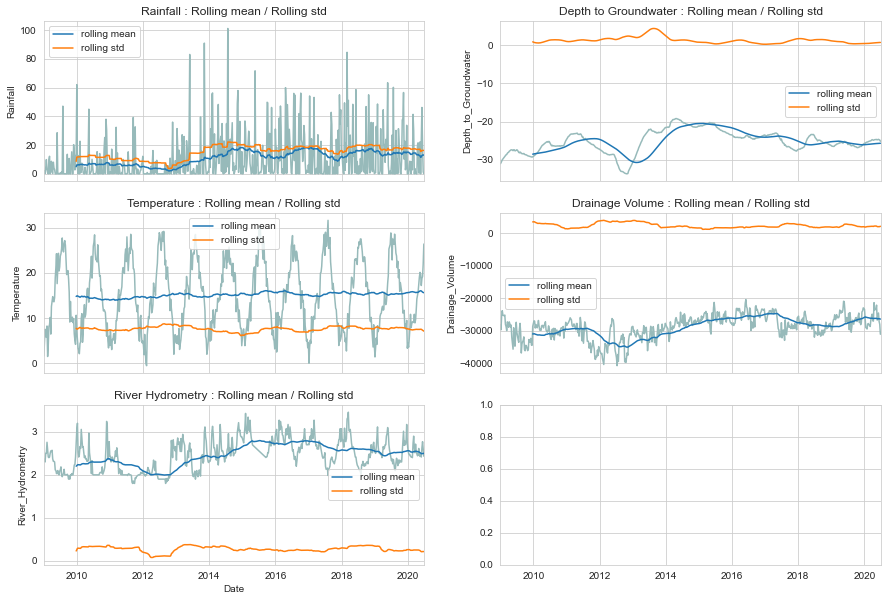

In [150]:
rolling_window = 52
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,10),sharex=True)

def timeseries_rolling_mean_std(variable, axes, title):
    sns.lineplot(data=df, x='Date', y = variable, color = '#97baba', ax=axes)
    sns.lineplot(data=df, x='Date', y = df[variable].rolling(rolling_window).mean(), label='rolling mean',ax=axes)
    sns.lineplot(data=df, x='Date', y = df[variable].rolling(rolling_window).std(), label='rolling std', ax=axes)
    axes.set_title(title)

timeseries_rolling_mean_std('Rainfall', ax[0,0], "Rainfall : Rolling mean / Rolling std")
timeseries_rolling_mean_std('Depth_to_Groundwater', ax[0,1], "Depth to Groundwater : Rolling mean / Rolling std")
timeseries_rolling_mean_std('Temperature', ax[1,0], "Temperature : Rolling mean / Rolling std")
timeseries_rolling_mean_std('Drainage_Volume', ax[1,1], "Drainage Volume : Rolling mean / Rolling std")
timeseries_rolling_mean_std('River_Hydrometry', ax[2,0], "River Hydrometry : Rolling mean / Rolling std")
    
for i in range(3):
    ax[i,0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    ax[i,1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
plt.show()